Grafica PoS individual


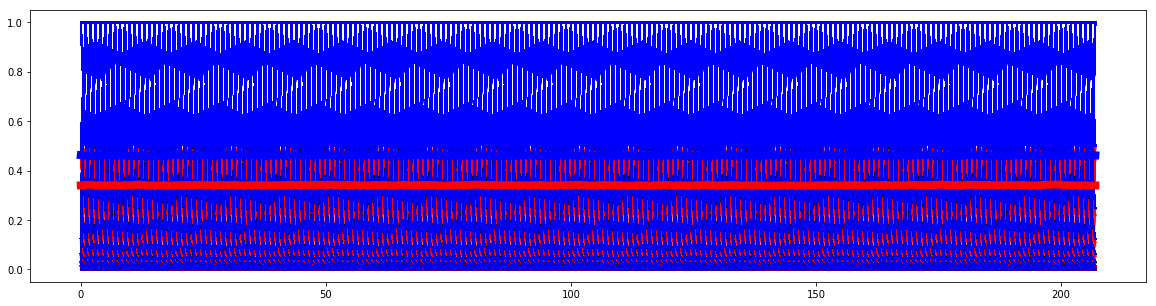

Grafica PoS media por grupos
Porcentaje grupos con distinta media de crimen
[0.5 0.5]
velocidad de olvido
0.5
impacto de la inseguridad nu
0.9
Resistencia a la inseguridad mu
0.1


/usr/local/lib/python2.7/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


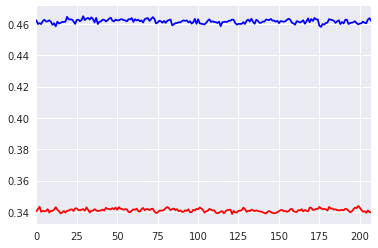

In [1]:
#Diferencia entre la distribucion del crimen

#En este experimento la poblacion esta dividida en dos grupos, cada 
#grupo sufre un evento criminal por periodo, en el primer grupo un 
#sujeto se fija para ser la vitima del crimen en todos los periodos
#y en el segundo se escoge aleatoriamente.

import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

n = 10000  # numero de personas
T = 312  # numero de periodos
s = np.random.rand(n)  # vector PoS de las personas en el intante t, al principio aleatorio
g=np.zeros(n)#vector identificacion de grupo
psi = 0.5  # velocidad perdida de memoria
nu = 0.9  # Impacto de la inseguridad
mu = 0.1  # Resistencia a la inseguridad
St = np.zeros((T,n ))  # PoS a lo largo del tiempo
m = 2  # cantidad de grupos con distinta tasa de crimen por periodo

q = np.array([0.5, 0.5])  # porcentajes de los grupos en la poblacion total

# calculo de la Pos en el intante t
# en t=0 es s
St[0] = s
#fijamos el sujeto del grupo 1
#sujeto1=np.random.randint(n/2)
sujeto1=np.random.permutation(np.arange(int(n/2)))[:int(n/2*0.3)]
for t in range(1,T):
    # Al inicio de cada periodo aplicamos la perdida de memoria
    s = psi * s
    #fijamos el sujeto del grupo 2 en el periodo t
    #sujeto2=np.random.randint(n/2,n)
    sujeto2=np.random.permutation(np.arange(int(n/2),n))[:int(n/2*0.3)]
    #escogemos las parejas de comunicacion 
    paleatorio1=np.random.permutation(np.arange(int(n/2)))#personas grupo 1 en orden aleatorio
    grupo1persona1=paleatorio1[:int(n/2*0.1)] #primer 10%
    grupo1persona2=paleatorio1[-int(n/2*0.1):]#ultimo 10%
    paleatorio2=np.random.permutation(np.arange(int(n/2),n))#personas grupo 2 en orden aleatorio
    grupo2persona1=paleatorio1[:int(n/2*0.1)] #primer 10%
    grupo2persona2=paleatorio1[-int(n/2*0.1):]#ultimo 10%
    
    for k in range(len(grupo1persona1)):
        #para grupo 1
        aux1=grupo1persona1[k]
        aux2=grupo1persona2[k]
        
        if s[aux1]<s[aux2]:
            s[aux1] = s[aux1] - nu * (s[aux1] - s[aux2])
            s[aux2] = s[aux2] - mu * (s[aux2] - s[aux1])
        else:
            s[aux1] = s[aux1] - mu * (s[aux1] - s[aux2])
            s[aux2] = s[aux2] - nu * (s[aux2] - s[aux1])
        #para grupo 2    
        aux1=grupo2persona1[k]
        aux2=grupo2persona2[k]
        
        if s[aux1]<s[aux2]:
            s[aux1] = s[aux1] - nu * (s[aux1] - s[aux2])
            s[aux2] = s[aux2] - mu * (s[aux2] - s[aux1])
        else:
            s[aux1] = s[aux1] - mu * (s[aux1] - s[aux2])
            s[aux2] = s[aux2] - nu * (s[aux2] - s[aux1])
    
    #Crimen
    for k in range(len(sujeto1)):
        s[sujeto1[k]]=1
        s[sujeto2[k]]=1
        
    St[t] = s
%matplotlib inline 
plt.figure(figsize=(20,5))
print("Grafica PoS individual")
plt.plot(St[104:,np.arange(n/2)],'red',alpha=0.1)
plt.plot(St[104:,np.arange(n/2,n)],'blue',alpha=0.1)
plt.plot(np.mean(St[104:,np.arange(n/2)],axis=1),'red',linewidth=8)
plt.plot(np.mean(St[104:,np.arange(n/2,n)],axis=1),'blue',linewidth=8)
plt.show()
print("Grafica PoS media por grupos")
print("Porcentaje grupos con distinta media de crimen")
print(q)
print("velocidad de olvido")
print(psi)
print("impacto de la inseguridad nu")
print(nu)
print("Resistencia a la inseguridad mu")
print(mu)
sns.set(color_codes=True)
sns.tsplot(data=np.mean(St[104:,np.arange(n/2)],axis=1),color="red")
sns.tsplot(data=np.mean(St[104:,np.arange(n/2,n)],axis=1),color="blue")

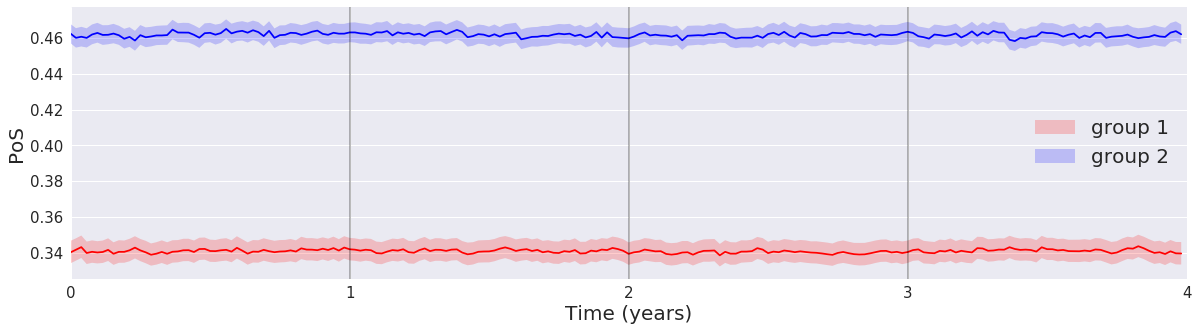

In [15]:
plt.figure(figsize=(20,5))
sns.tsplot(data=St[104:,np.arange(n/2)].T,color='red')
sns.tsplot(data=St[104:,np.arange(n/2,n)].T,color='blue')
plt.legend(["group 1","group 2"],fontsize=20)
plt.axvline(52, color = 'black',alpha=0.3)
plt.axvline(104, color = 'black',alpha=0.3)
plt.axvline(156, color = 'black',alpha=0.3)
plt.xlabel("Time (years)",fontsize=20)
plt.ylabel("PoS",fontsize=20)
ax = plt.axes()
ax.xaxis.set_ticks([0, 52, 104, 156, 208])
ax.xaxis.set_ticklabels(['0', '1', '2', '3', '4'])
ax.tick_params(labelsize=15)
plt.savefig('exp1paper.png')